In [31]:
import yfinance as yf

# Fetching Tesla stock data (symbol: TSLA)
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")

# Displaying the first few rows of Tesla stock data
tesla_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" 
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table')
    
    if table:
        table_html = str(table)  # Convert
        tesla_revenue = pd.read_html(StringIO(table_html))[0]  # 
        
        # Clean up the data
        tesla_revenue.columns = ['Year', 'Revenue']  
        tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)  # Remove $ and commas
        tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')  # Convert to numeric values

        # Display the last five rows of the data
        print(tesla_revenue.tail())
    else:
        print("No table found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


    Year  Revenue
10  2013     2013
11  2012      413
12  2011      204
13  2010      117
14  2009      112


In [23]:
# Fetch GameStop stock data
gme_data = yf.download('GME', period='1y', interval='1d')

gme_data.reset_index(inplace=True)
gme_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME,GME
0,2023-11-30,14.55,14.55,16.330000,14.32,16.290001,16537200
1,2023-12-01,15.30,15.30,15.990000,14.50,14.520000,13347300
2,2023-12-04,16.98,16.98,17.410000,14.91,15.290000,20098700
3,2023-12-05,14.91,14.91,16.719999,14.87,16.469999,14220100
4,2023-12-06,14.84,14.84,15.700000,14.64,15.360000,12691300


In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO  # Import StringIO for wrapping the HTML

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"  # Replace with actual URL

# Send a request to get the webpage content
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the first table with the relevant data
    table = soup.find('table')
    
    if table:
        # Convert the HTML table into a DataFrame
        table_html = str(table)  # Convert the table to a string
        gme_revenue = pd.read_html(StringIO(table_html))[0]  # Use StringIO to read the HTML
        
        # Clean up the data
        gme_revenue.columns = ['Year', 'Revenue']  # Set proper column names
        gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)  # Remove $ and commas
        gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')  # Convert to numeric values

        # Display the last five rows of the data
        print(gme_revenue.tail())
    else:
        print("No table found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


    Year  Revenue
11  2013     8887
12  2012     9551
13  2011     9474
14  2010     9078
15  2009     8806


[*********************100%***********************]  1 of 1 completed


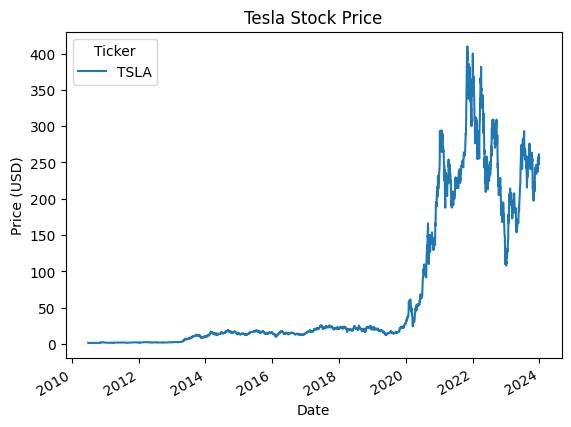

In [43]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2024-01-01')

# Plot the closing price of Tesla stock
tesla_data['Close'].plot(title='Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


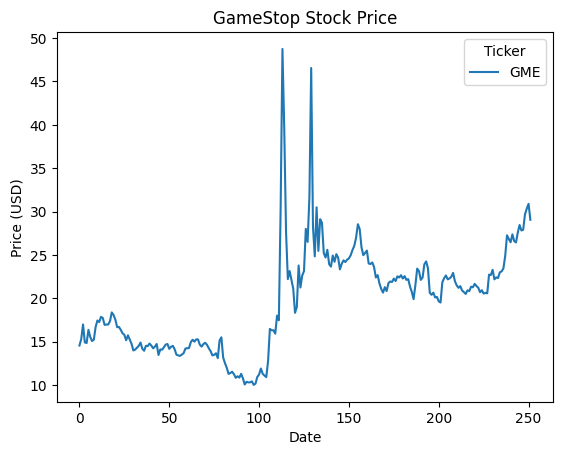

In [44]:
# Plotting GameStop stock data
gme_data['Close'].plot(title='GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()
